<a href="https://colab.research.google.com/github/Azitt/ML_pytorch_Audioprocessing/blob/main/ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 A classical application is the classification of handwritten digits(60000 gray-scale images of handwritten images of size 28x28 pixels). The network input are the images, and each image belongs to one of the 10 digit classes, 0 to 9.

The network has as many outputs as classes (10 in the digit example), and each output might represent the probability that the image at the networks input belongs to the corresponding class. The probabilities must add up to 1. 

In [1]:
import numpy
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn
import time

device='cpu'

In [3]:
batch_size_train = 100
batch_size_test = 10
num_classes = 10  #10 classes according to the 10 possible digits 0,...,9

In [4]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('~/Downloads/MNISTfiles/', 
    train=True, download=True,
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size_train, shuffle=True)
#the Normalize() arguments are mean and standard deviation.

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('~/Downloads/MNISTfiles/', 
                               train=False, download=True,
                               transform=torchvision.transforms.Compose(
                                   [torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size_test, shuffle=True)


examples = enumerate(train_loader)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/Downloads/MNISTfiles/MNIST/raw/train-images-idx3-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/Downloads/MNISTfiles/MNIST/raw/train-labels-idx1-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/Downloads/MNISTfiles/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/Downloads/MNISTfiles/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw



X_train.type()= torch.FloatTensor y_train.type()= torch.LongTensor
batch_idx= 0 X_train.shape= torch.Size([100, 1, 28, 28]) y_train.shape= torch.Size([100]) y_train= tensor([8, 4, 7, 6, 9, 3, 4, 7, 5, 5, 1, 5, 4, 9, 4, 1, 9, 9, 7, 2, 0, 6, 5, 3,
        6, 7, 1, 9, 0, 0, 8, 6, 9, 3, 2, 5, 4, 2, 5, 4, 8, 3, 1, 1, 5, 9, 8, 1,
        6, 3, 8, 0, 6, 6, 6, 0, 2, 9, 8, 1, 9, 0, 7, 6, 5, 0, 9, 9, 3, 7, 4, 7,
        1, 2, 1, 4, 3, 1, 7, 0, 1, 2, 8, 9, 0, 5, 7, 6, 1, 4, 0, 7, 4, 9, 6, 0,
        5, 2, 9, 7])


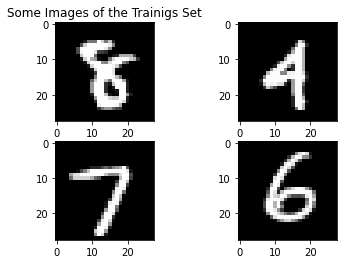

In [5]:
batch_idx, (X_train, y_train) = next(examples)
print( "X_train.type()=",X_train.type(), "y_train.type()=",y_train.type())
print("batch_idx=", batch_idx, "X_train.shape=", X_train.shape, "y_train.shape=", y_train.shape, "y_train=", y_train)
examples = enumerate(test_loader)
#one batch of 100 images:
batch_idx, (X_test, y_test) = next(examples)

# plot 4 images as gray scale
plt.subplot(221)
plt.title("Some Images of the Trainigs Set")
plt.imshow(X_train[0,0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1,0], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2,0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3,0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

X_train.shape= torch.Size([100, 1, 28, 28])  
100 = the number of images , 1 = batch size , 28*28 = vertically and horizontally pixels.

y_train.shape= torch.Size([100])

shape of the target, which is a 1-dimensional array of 100 entries.

the loss function is "CrossEntropyLoss" and measures about how different 2 probability distributions are.
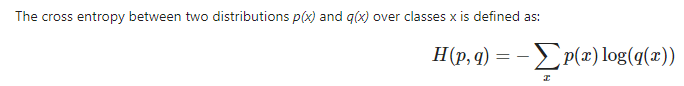

In [6]:
X_testunflat=X_test.clone() #keep original for imshow later
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[2] * X_train.shape[3]

# define the neural network model

In [2]:
class DenseNet(nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.layer1=nn.Sequential(nn.Linear(in_features=num_pixels, out_features=num_pixels))
        self.layer2=nn.Sequential(nn.Linear(in_features=num_pixels, out_features=num_classes))
      
   
    def forward(self, x):
        x = F.relu(self.layer1(x))  #First layer with activation function
        x = self.layer2(x)   #Second layer
        #x = torch.nn.Softmax(x)
        return x

#Flatten the images

In [7]:
X_train = X_train.view(X_train.shape[0], num_pixels)
print("X_train.shape=",X_train.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print("X_test.shape=",X_test.shape)

X_train.shape= torch.Size([100, 784])
X_test.shape= torch.Size([10, 784])


# build the model

In [10]:
model = DenseNet()#.to('cpu')    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())#, lr=learning_rate)
# Fit the model
X_train=X_train.to(device)
y_train=y_train.to(device)

In [11]:
starttime=time.time()
for epoch in range(10):
    Ypred=model(X_train)
    loss=loss_fn(Ypred, y_train)
    if epoch%2==0:
        print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
       
endtime=time.time()
print("Duration of optimization:", endtime-starttime)

0 2.3236582279205322
2 1.1740723848342896
4 0.5760006904602051
6 0.2895786464214325
8 0.14311107993125916
Duration of optimization: 0.2849431037902832


# Final evaluation of the model

In [12]:
Ypred=model(X_test)
loss=loss_fn(Ypred, y_test)
#scores = model.forward(X_test, y_test, verbose=0)
print("Loss on the test set:", loss)

torch.save({'model_state_dict': model.state_dict(),
       'optimizer_state_dict': optimizer.state_dict()}, "mnistexample_pytorch_weights.torch")
print("Wrote to mnistexample_pytorch_weights.torch")

Loss on the test set: tensor(0.4793, grad_fn=<NllLossBackward0>)
Wrote to mnistexample_pytorch_weights.torch


#"Inference", predict an example digit test image:

sample.shape= torch.Size([784])
Test Ypred= tensor([ 3.4547, -1.9759,  1.9475, -3.6746, -1.4648,  0.7912,  3.8370, -1.2211,
        -1.5775, -2.2210], grad_fn=<AddBackward0>)
prediction= tensor(6)


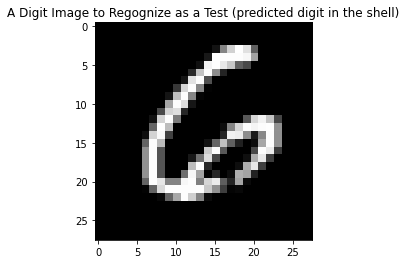

In [13]:
plt.imshow(X_testunflat[1,0], cmap=plt.get_cmap('gray'))
plt.title("A Digit Image to Regognize as a Test (predicted digit in the shell)")

sample=X_test[1,:]
print("sample.shape=", sample.shape)
Ypred=model(sample)
print("Test Ypred=", Ypred)
prediction=torch.argmax(Ypred) #use argmax as the class with the largest output
print("prediction=", prediction)

plt.show()